In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [5]:
# Set the desired working directory
change_directory = 'C:\\Users\\windows\\OneDrive\\Desktop'

# Change the working directory
os.chdir(change_directory)

In [6]:
# Load the data
data = pd.read_csv("data_ge.csv")     ### Read from Excel file        df = pd.read_excel('data.xlsx')
# Create a DataFrame
df = pd.DataFrame(data)

In [7]:
# Group by 'ENV' column
grouped = df.groupby('ENV')


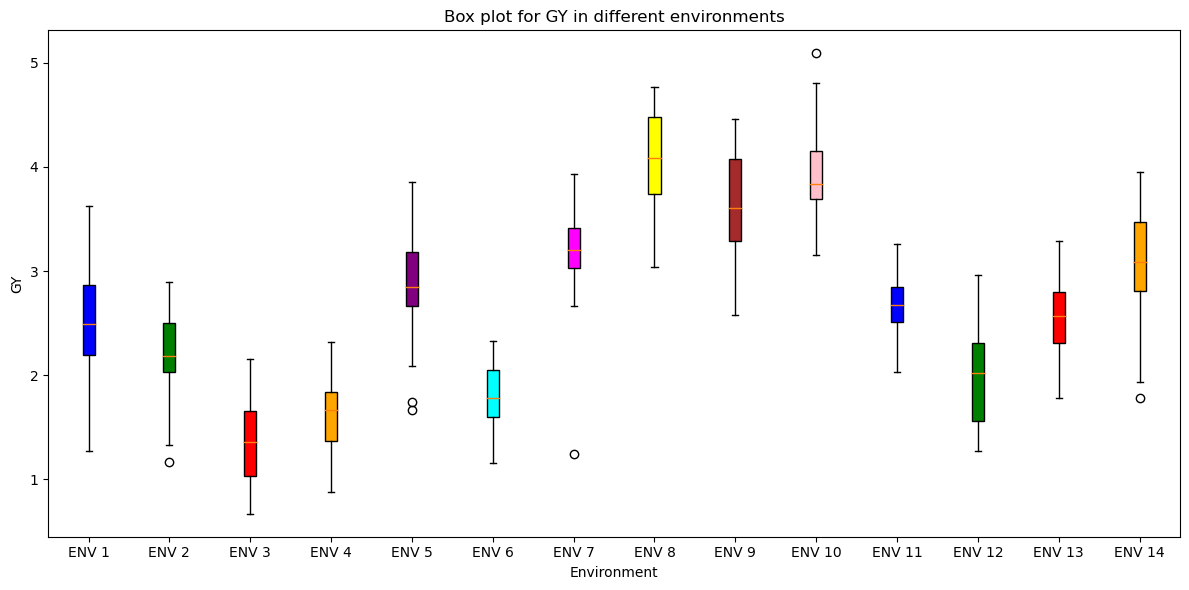

In [15]:
# Define colors for each environment
colors = ['blue', 'green', 'red', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'brown', 'pink']

# Plotting box plots for each environment
plt.figure(figsize=(12, 6))

for i, (name, group) in enumerate(grouped):
    color = colors[i % len(colors)]  # Cycling through colors
    plt.boxplot(group['GY'], positions=[i], patch_artist=True, boxprops=dict(facecolor=color))

plt.xlabel('Environment')
plt.ylabel('GY')
plt.title('Box plot for GY in different environments')
plt.xticks(range(len(grouped)), [f'ENV {i}' for i in range(1, len(grouped) + 1)])
plt.tight_layout()
plt.show()


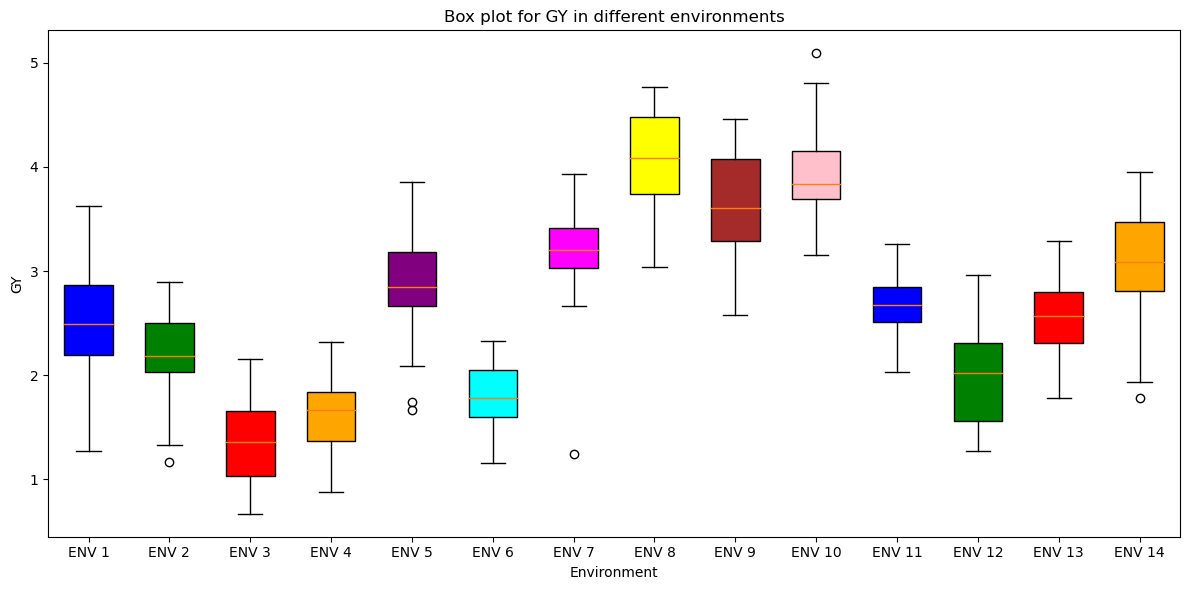

In [16]:
# Define colors for each environment
colors = ['blue', 'green', 'red', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'brown', 'pink']

# Plotting box plots for each environment
plt.figure(figsize=(12, 6))

for i, (name, group) in enumerate(grouped):
    color = colors[i % len(colors)]  # Cycling through colors
    plt.boxplot(group['GY'], positions=[i], patch_artist=True, boxprops=dict(facecolor=color), widths=0.6)  # Adjusting the width

plt.xlabel('Environment')
plt.ylabel('GY')
plt.title('Box plot for GY in different environments')
plt.xticks(range(len(grouped)), [f'ENV {i}' for i in range(1, len(grouped) + 1)])
plt.tight_layout()
plt.show()


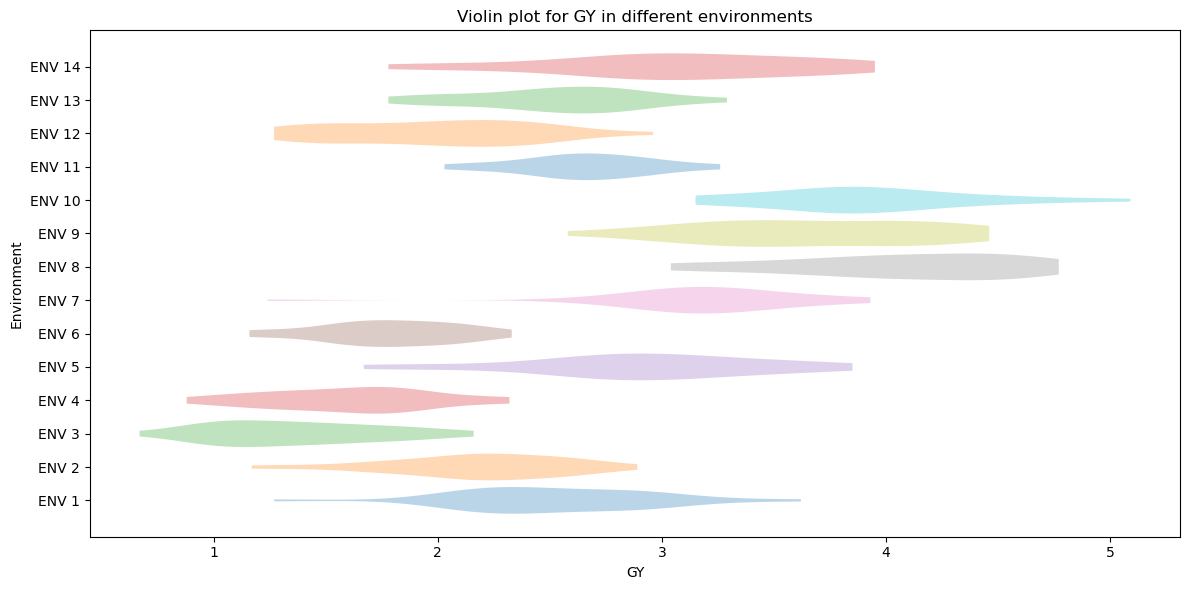

In [17]:
# Define colors for each environment
colors = ['blue', 'green', 'red', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'brown', 'pink']

# Plotting violin plots for each environment
plt.figure(figsize=(12, 6))

for i, (name, group) in enumerate(grouped):
    color = colors[i % len(colors)]  # Cycling through colors
    plt.violinplot(group['GY'], positions=[i], showmeans=False, showextrema=False, widths=0.8, vert=False, points=200, bw_method=0.5)

plt.xlabel('GY')
plt.ylabel('Environment')
plt.title('Violin plot for GY in different environments')
plt.yticks(range(len(grouped)), [f'ENV {i}' for i in range(1, len(grouped) + 1)])
plt.tight_layout()
plt.show()


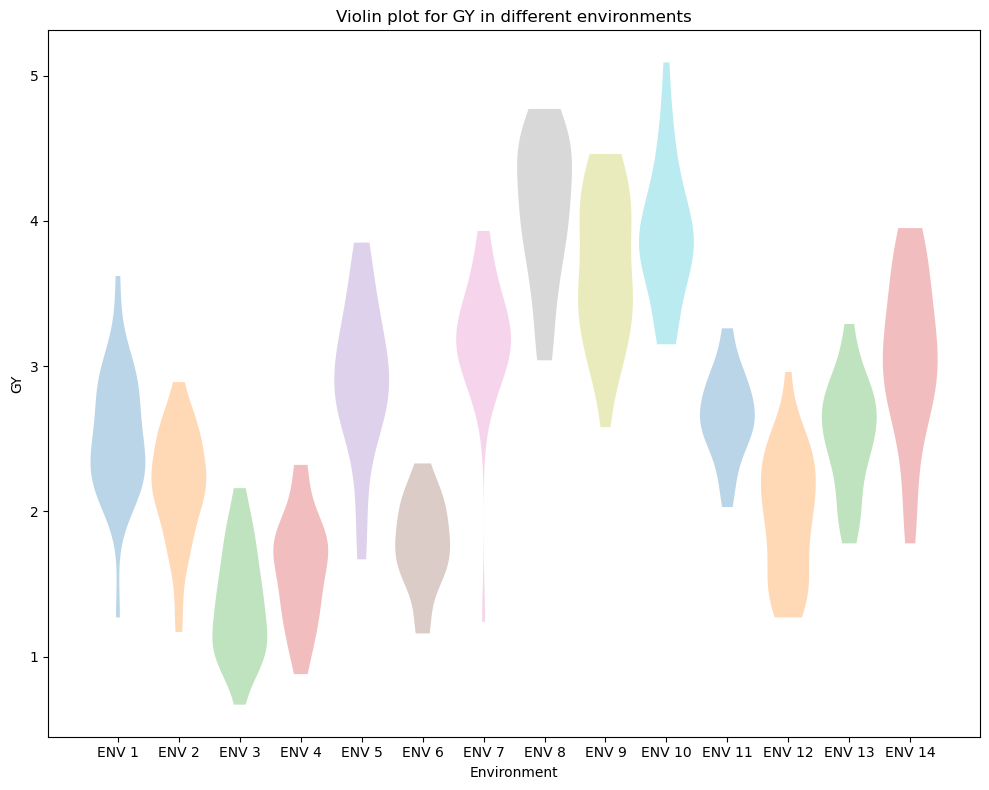

In [18]:
# Define colors for each environment
colors = ['blue', 'green', 'red', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'brown', 'pink']

# Plotting violin plots for each environment
plt.figure(figsize=(10, 8))

for i, (name, group) in enumerate(grouped):
    color = colors[i % len(colors)]  # Cycling through colors
    plt.violinplot(group['GY'], positions=[i], showmeans=False, showextrema=False, widths=0.9, vert=True, points=200, bw_method=0.5)

plt.ylabel('GY')
plt.xlabel('Environment')
plt.title('Violin plot for GY in different environments')
plt.xticks(range(len(grouped)), [f'ENV {i}' for i in range(1, len(grouped) + 1)])
plt.tight_layout()
plt.show()


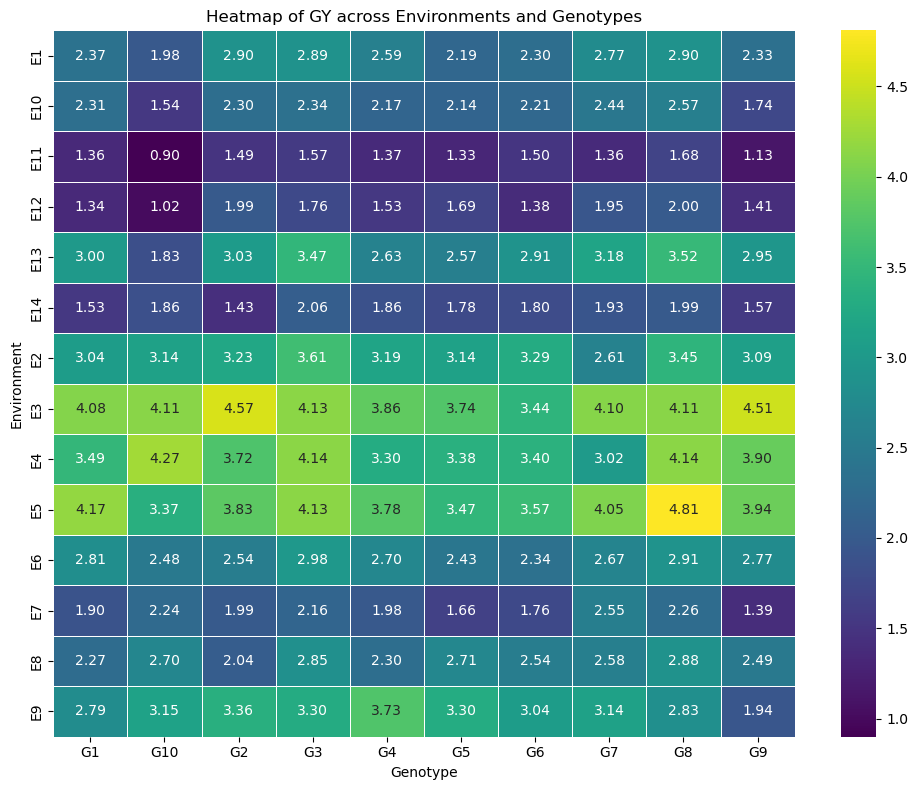

In [21]:
import seaborn as sns

# Pivot the DataFrame for better visualization
pivot_df = df.pivot_table(index='ENV', columns='GEN', values='GY')

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, cmap='viridis', annot=True, fmt=".2f", linewidths=.5)
plt.title('Heatmap of GY across Environments and Genotypes')
plt.xlabel('Genotype')
plt.ylabel('Environment')
plt.tight_layout()
plt.show()


<Figure size 1000x800 with 0 Axes>

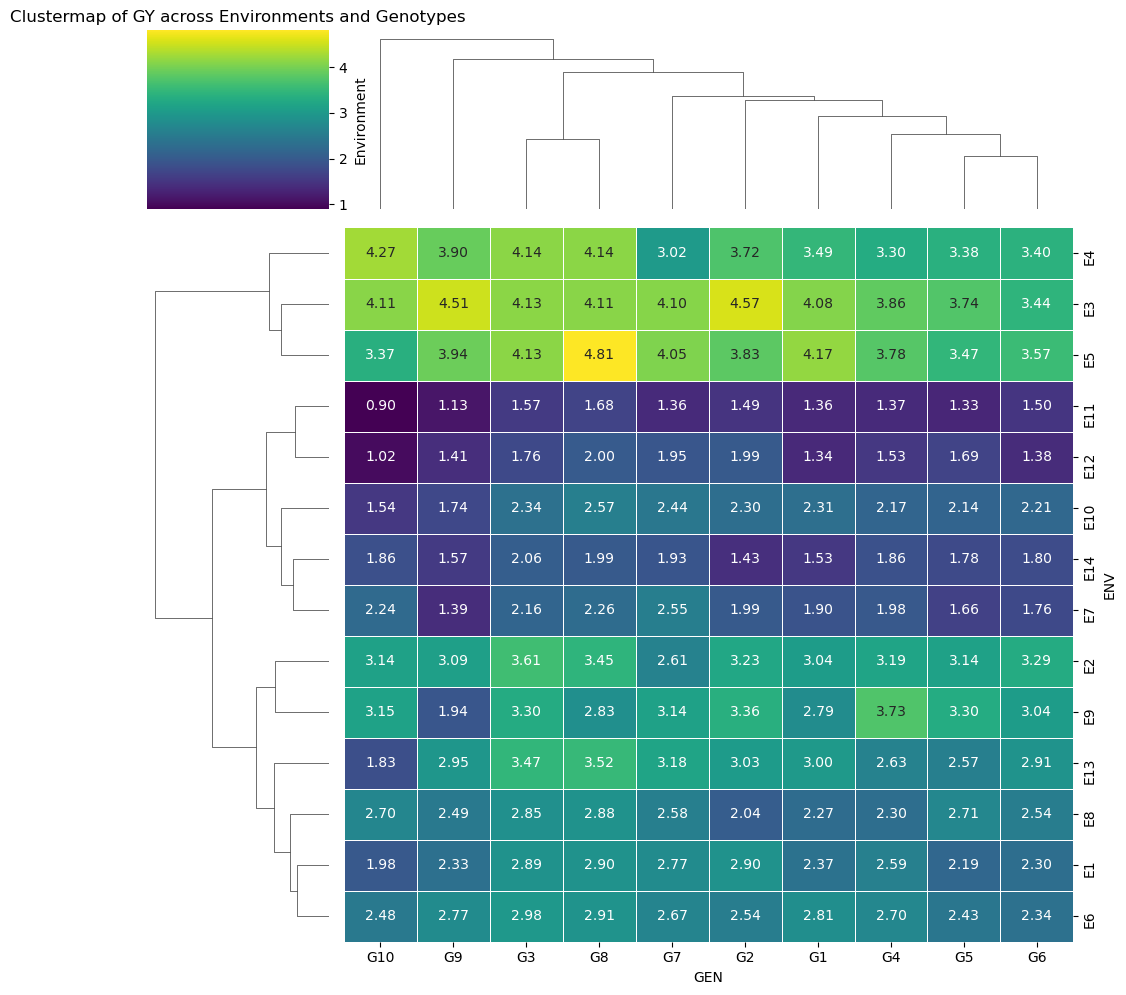

In [22]:
# Create a clustermap
plt.figure(figsize=(10, 8))
sns.clustermap(pivot_df, cmap='viridis', annot=True, fmt=".2f", linewidths=.5)
plt.title('Clustermap of GY across Environments and Genotypes')
plt.xlabel('Genotype')
plt.ylabel('Environment')
plt.tight_layout()
plt.show()


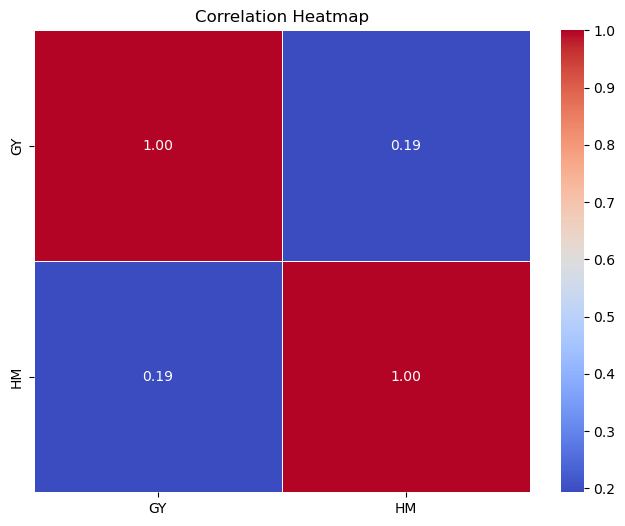

In [23]:
# Calculate the correlation matrix
corr_matrix = df[['GY', 'HM']].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

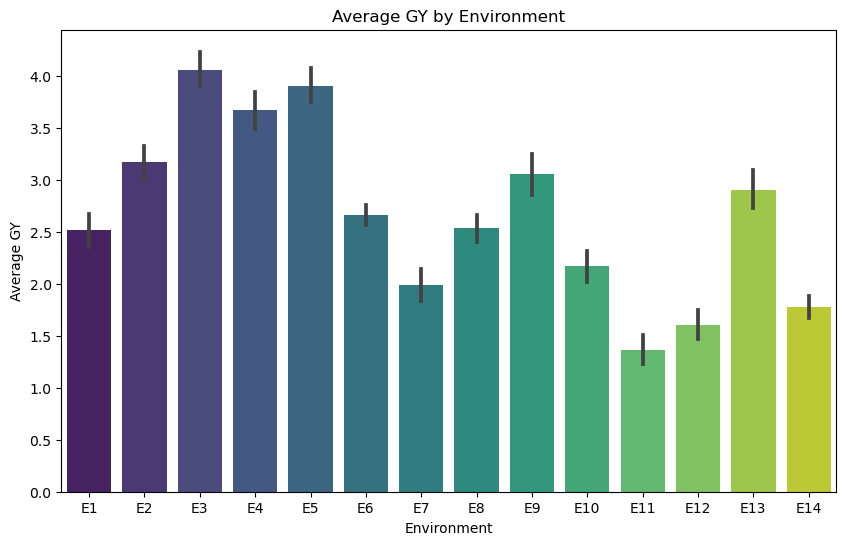

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='ENV', y='GY', data=df, palette='viridis')
plt.title('Average GY by Environment')
plt.xlabel('Environment')
plt.ylabel('Average GY')
plt.show()


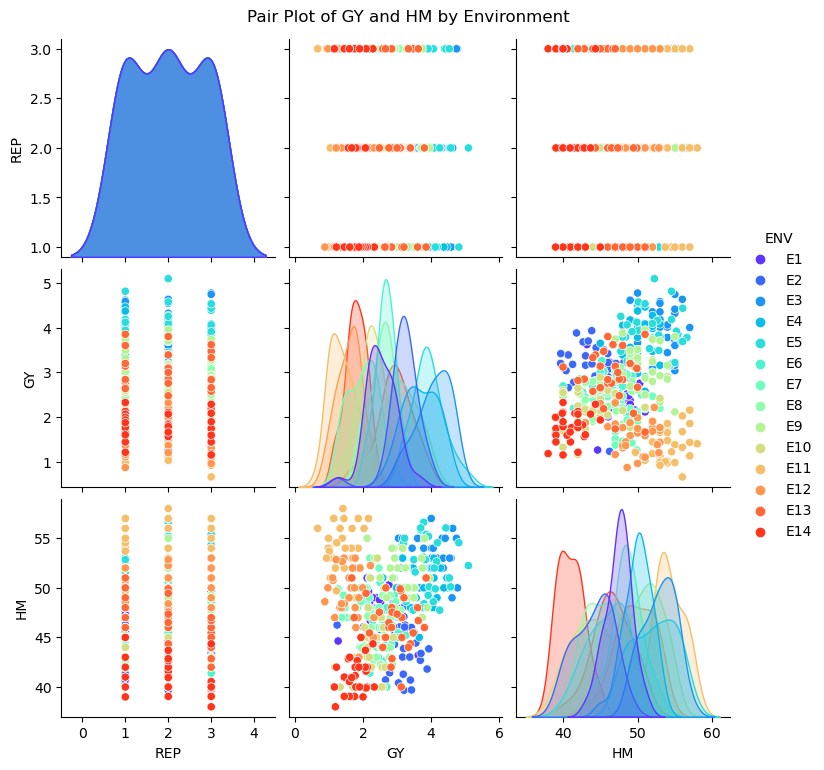

In [26]:
sns.pairplot(df, hue='ENV', palette='rainbow', height=2.5)
plt.suptitle('Pair Plot of GY and HM by Environment', y=1.02)
plt.show()


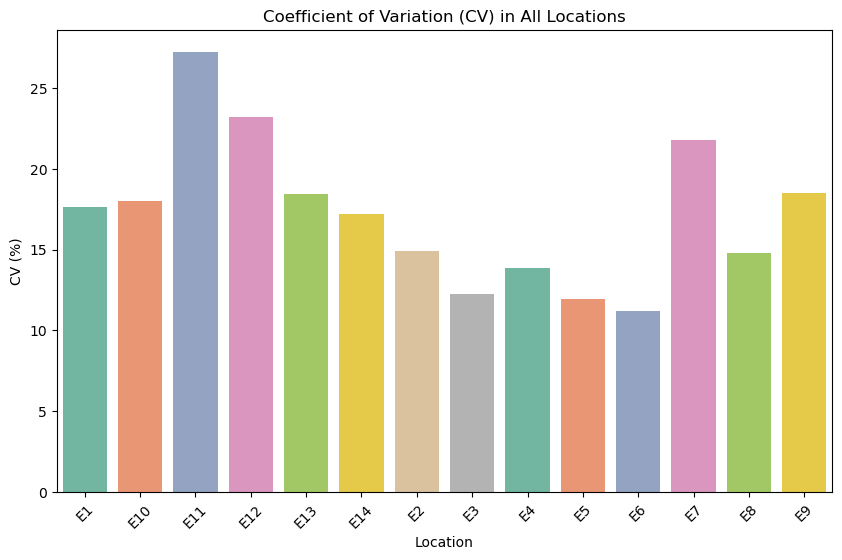

In [27]:
# Calculate CV for each location
cv_by_location = df.groupby('ENV')['GY'].std() / df.groupby('ENV')['GY'].mean() * 100

# Plotting bar plot for CV in all locations
plt.figure(figsize=(10, 6))
sns.barplot(x=cv_by_location.index, y=cv_by_location.values, palette='Set2')
plt.title('Coefficient of Variation (CV) in All Locations')
plt.xlabel('Location')
plt.ylabel('CV (%)')
plt.xticks(rotation=45)
plt.show()

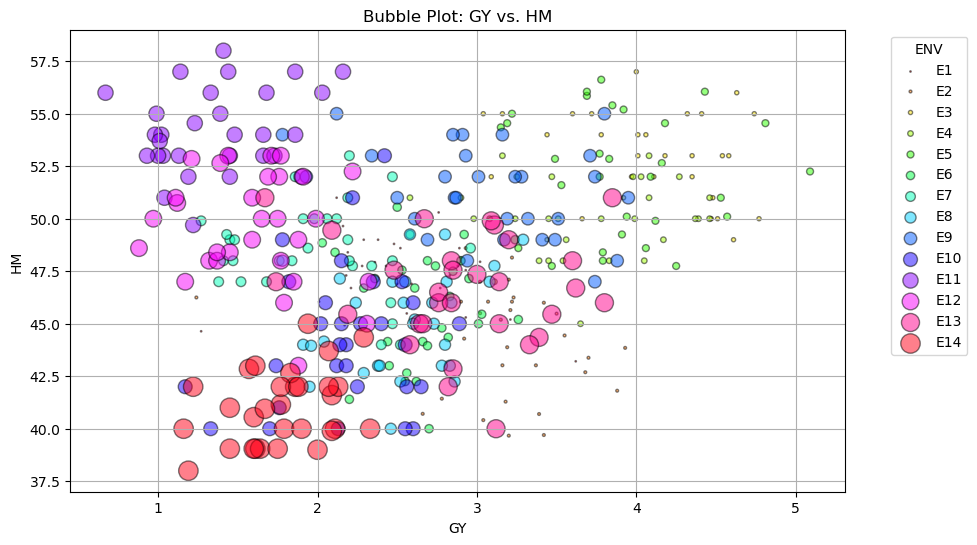

In [31]:
# Define variables for the plot
x = df['GY']
y = df['HM']
sizes = df['ENV'].apply(lambda x: int(x[1:]))  # Using ENV as bubble size, converting to int

# Define colors for each environment using hsv colormap
colors = plt.cm.get_cmap('hsv', len(df['ENV'].unique()))  # Using hsv colormap for vibrant colors

# Plot
plt.figure(figsize=(10, 6))

for env, i in zip(df['ENV'].unique(), range(len(df['ENV'].unique()))):
    env_data = df[df['ENV'] == env]
    plt.scatter(env_data['GY'], env_data['HM'], s=env_data['ENV'].apply(lambda x: int(x[1:]))**2,
                alpha=0.5, c=[colors(i)], edgecolors='black', label=env)

plt.title('Bubble Plot: GY vs. HM')
plt.xlabel('GY')
plt.ylabel('HM')
plt.legend(title='ENV', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()